# Tutorial 4 Notebook - Fourier Transforms
In this notebook, we will be practicing implementing fourier transforms
You need to be able to do this for your first assignment!
As usual, please read through the code and understand it. A [youtube tutorial](https://www.youtube.com/watch?v=rnG8VMXq96k&t=1s) for this notebook is available.

In [1]:
import numpy as np
import scipy as sp
import scipy.fftpack
from matplotlib import pyplot as plt

## Part 1 - Baby's First Fourier Transform.
We are going to make a sinusoid with a certain frequency, then see if we can pick up the frequency from our fourier transform

Time Base:
[0.  0.1 0.2 0.3 0.4]


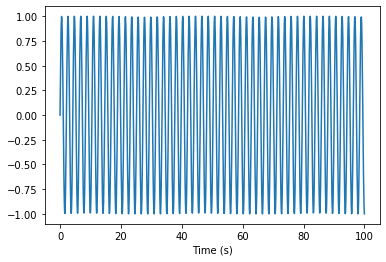

[ 0.          0.00999001  0.01998002 ... -0.02997003 -0.01998002
 -0.00999001]
We should be expecting a peak at 0.477464829275686 Hz


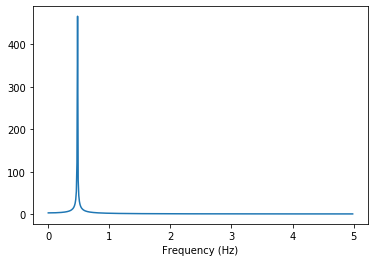

In [5]:
# Parameters that we might change (I like to keep these separate, to make it easier)
frequency = 3 #rads/sec, frequency of our sinusoid
sampling_time = 100 #seconds, how long in time we will generate our sinusoid for.
timestep = 0.1 #seconds, the time in between each sample. (The inverse of this is our sample rate in Hz)

# Generate our timebase
num_samples = int(sampling_time/timestep) + 1  # Number of samples we will take
time_base = np.linspace(0, sampling_time, num_samples)
print("Time Base:")
print(time_base[0:5]) # Print out the first 5 items in the timebase just to check that it's what we expect

# Generate our sinusoid, and plot it!
x = np.sin(time_base*frequency)
#x = np.exp(-(time_base - np.mean(time_base))**2)
plt.plot(time_base, x)
plt.xlabel('Time (s)')
plt.show()
# Generate the fourier transform of our sinusoid
X = sp.fftpack.fft(x)
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep) # Generates our frequency base
print(freq_base)

# Prepare to plot our fourier transform (effort!)
# Step 1 - take the absolute value of our fourier transform
X = np.abs(X)
# Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])
# Step 3 - plot the thing!
plt.figure()
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')

print("We should be expecting a peak at " + str(frequency/(2*np.pi)) + " Hz")


**Homework** 
Change the function! Find the fourier transform of the following functions: 
1) Gaussian
2) Step Function
3) Point Function

Try to add noise to the sinusoid! See how this noise shows up on the fourier transform!

## Part 2 - Russian Resolution 
Playing around with the resolution of f tranforms. Our goal; understand how the number of samples affects the resolution of our fourier transform. 


Time Base:
[0.  0.1 0.2 0.3 0.4]


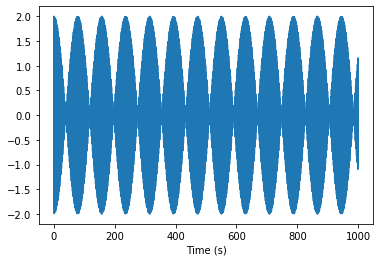

In [12]:
# Let's generate a compound sinusoid with the frequencies very close together, and try to resolve the difference.

# Parameters that we might change (I like to keep these separate, to make it easier)
frequency_1 = 3.1514 #rads/sec
frequency_2 = 3.2312 #rads/sec

sampling_time = 1000 #seconds, how long in time we will generate our sinusoid for.
timestep = 0.1 #seconds, the time in between each sample. (The inverse of this is our sample rate in Hz)

# Generate our timebase
num_samples = int(sampling_time/timestep) + 1  # Number of samples we will take
time_base = np.linspace(0, sampling_time, num_samples)
print("Time Base:")
print(time_base[0:5]) # Print out the first 5 items in the timebase just to check that it's what we expect

# Generate our sinusoid, and plot it!
x = np.sin(time_base*frequency_1) + np.sin(time_base*frequency_2)
plt.plot(time_base, x)
plt.xlabel('Time (s)')
plt.show()

Note that we have a beat frequency on top of our two frequencies (what does THIS remind you of????)

[ 0.         0.0009999  0.0019998 ... -0.0029997 -0.0019998 -0.0009999]


Text(0.5, 0, 'Frequency (Hz)')

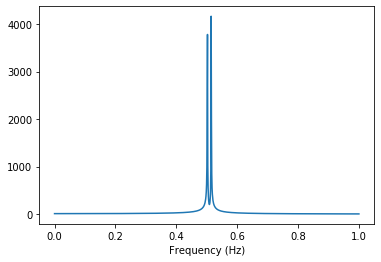

In [14]:
# Generate the fourier transform of our sinusoid
X = sp.fftpack.fft(x)
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep) # Generates our frequency base
print(freq_base)

# Prepare to plot our fourier transform (effort!)
# Step 1 - take the absolute value of our fourier transform
X = np.abs(X)

# Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
X = np.copy(X[:num_samples//2-4000])
freq_base = np.copy(freq_base[:num_samples//2-4000])
# Step 3 - plot the thing!
plt.figure()
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')

We now have two peaks - but we would like to improve their resolution a bit. 

**Homework** - Using what you learned in the tute, make changes to improve the resolution of these two frequencies. You may wish to plot only a subset of the fourier transfrom data (do this using a slice, eg plot(X[0:100]))

## Part 3 - Image Processing! 
In this section, you're going to try and remove the noise from an image using the fourier transform.


In [29]:
import imageio # Useful image processing stuff
import scipy.fftpack
from matplotlib import pyplot as plt

# Read in the image (this last part just extracts the greyscale intensity values - we aren't going to deal with color!)
Image = imageio.imread("SlothySin.png")
plt.imshow(Image,cmap='gray')

X[500:600,500:600] = 1

FileNotFoundError: No such file: 'C:\Users\z3372528\Dropbox\0PHD\2020\[TEACHING] Phys3112 Tutes\Tutorials-2020\Tutorial 4 Fourier Transforms\SlothySin.png'

C:\Users\z3372528\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


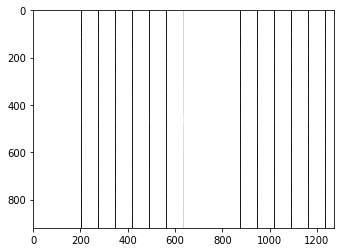

C:\Users\z3372528\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


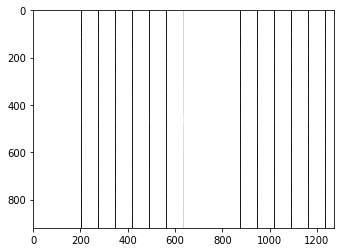

[[127.-4.24058200e-14j 127.-4.23285871e-14j 127.-4.43211961e-14j ...
  127.-4.31627025e-14j 127.-4.37496726e-14j 127.-5.12567110e-14j]
 [132.+3.53639121e-14j 132.+3.51978614e-14j 132.+3.51939997e-14j ...
  132.+3.61825809e-14j 132.+3.61362412e-14j 132.+3.52094463e-14j]
 [136.-3.83279226e-14j 136.-2.93071191e-14j 136.-3.39719866e-14j ...
  136.-2.98940892e-14j 136.-3.58255764e-14j 136.-2.94770315e-14j]
 ...
 [ 32.+5.34819515e-15j  32.+1.04207582e-14j  32.+2.36639533e-14j ...
   32.+1.87077704e-14j  32.+2.54652297e-14j  32.+7.97907036e-15j]
 [ 35.-4.35902162e-14j  35.-5.16663260e-14j  35.-4.29154910e-14j ...
   35.-4.06017900e-14j  35.-4.08286357e-14j  35.-4.28669001e-14j]
 [ 38.+2.20709437e-14j  38.+2.68216604e-14j  38.+2.70445469e-14j ...
   38.+1.74810280e-14j  38.+2.64445632e-14j  38.+2.38542692e-14j]]


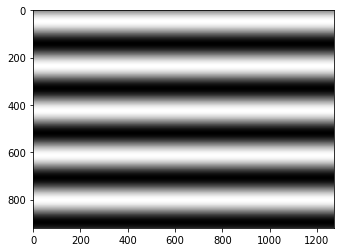

In [28]:
# Complete the 2D fourier transform of this image
fftRaw = scipy.fftpack.fft2(Image)
# Re-arrange the transform so that the centre is the 'low frequency' section
fftShifted = scipy.fftpack.fftshift(fftRaw)

# Take a look at the fourier transform (you have to take the log to see any useful contrast)
# We are also taking the absolute value because we are looking at the intensity! 
#      We don't want phase information (complex component of the FT)

plt.imshow(np.log(np.abs(fftShifted)), cmap='gray')
plt.show()

# INSERT PROCESSING HERE 

# Show our fourier-plane after processing 
plt.imshow(np.log(np.abs(fftShifted)), cmap='gray')
plt.show()

# Reverse the FFT and generate our final image
image_out = scipy.fftpack.ifft2(scipy.fftpack.fftshift(fftShifted))
print(image_out)
plt.imshow(np.abs(image_out), cmap='gray')

## Your challenge is to do the processing of the fourier tranform! You will need to **exclude** certain regions of the fourier transform, and then transform the image back.

To get an idea of what to do, look at the fourier transforms of the three files - one has no noise, one has a bit of noise, and one has a lot of noise - what's the difference?